# 0. 라이브러리

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns

In [289]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. 데이터

In [290]:
list_fin = pd.read_csv('./data/정상기업재무데이터.csv', dtype={'종목코드':str})
delist_fin = pd.read_csv('./data/부도기업재무데이터.csv', dtype={'종목코드':str})

In [291]:
micro_eco = pd.read_csv('./data/거시경제데이터.csv')

micro_eco = micro_eco.rename(columns={'Unnamed: 0':'연도'})
micro_eco

,연도,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수
0,2015,2.81,1131.0,0.7,-4.0,1.65,1.76,1.79,"1,961.31",682.35,"105,118.60",93.2,3.6,97.59,105.45,73.92
1,2016,2.95,1160.8,1.0,-1.8,1.34,1.49,1.44,"2,026.46",631.44,"97,923.70",96.0,3.7,95.08,96.24,75.88
2,2017,3.16,1131.0,1.9,3.5,1.26,1.44,1.80,"2,467.49",798.42,"75,230.90",98.5,3.7,99.78,106.92,76.86
3,2018,2.91,1100.2,1.5,1.9,1.52,1.68,2.10,"2,041.04",675.65,"77,466.50",100.1,3.8,97.83,99.70,78.57
4,2019,2.24,1165.4,0.4,0.0,1.59,1.69,1.53,"2,197.67",669.83,"59,676.10",101.1,3.8,94.09,96.00,79.69
5,2020,-0.71,1180.3,0.5,-0.5,0.70,0.92,0.99,"2,873.47",968.42,"75,902.20",100.0,4.0,79.18,96.71,82.71
6,2021,4.30,1144.0,2.5,6.4,0.61,0.85,1.39,"2,977.65","1,033.98","85,228.20",105.3,3.7,103.34,112.40,93.93
7,2022,2.61,1291.4,5.1,8.4,2.03,2.49,3.20,"2,236.40",679.29,"29,830.90",110.1,2.9,100.28,94.21,100.14


# 2. 거시경제 데이터 합치기

## 2.1) 정상기업

In [292]:
list_fin = pd.merge(list_fin, micro_eco, left_on='기준연도', right_on='연도', how='left')
list_fin = list_fin.drop('연도', axis=1)
list_fin.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,유동부채,유동자산,비유동자산,비유동부채,부채비율,자기자본비율,유동부채비율,비유동부채비율,총자산영업이익율,ROA,ROE,매출액영업이익율,매출액순이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수
0,3S,060310,2002-04-23,7861 days,2022,6.512786e+10,2.678888e+10,3.833899e+10,2.711063e+10,1.452134e+09,1.171370e+09,2.442367e+10,2.888501e+10,3.624285e+10,2.365204e+09,69.873715,41.132741,63.704527,6.169188,0.022297,0.017986,0.031284,0.053563,0.043207,16.142265,13.399616,40.639176,196.979059,1.182665,0.416268,1.012011,0.707129,24.023192,24.899618,2.61,1291.4,5.1,8.4,2.03,2.49,3.2,"2,236.40",679.29,"29,830.90",110.1,2.9,100.28,94.21,100.14


In [293]:
list_fin = list_fin[list_fin.기업명 != '세종메디칼']

## 2.2) 부도기업

In [294]:
delist_fin['폐지일'] = pd.to_datetime(delist_fin['폐지일'])
delist_fin['폐지전년도'] = delist_fin['폐지일'].dt.year - 1

In [295]:
delist_fin = pd.merge(delist_fin, micro_eco, left_on='폐지전년도', right_on='연도', how='left')
delist_fin = delist_fin.drop(['폐지전년도', '연도'], axis=1)
delist_fin.head(1)

,기업명,종목코드,폐지일,상장일,지속기간,기준연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,유동부채,유동자산,비유동자산,비유동부채,부채비율,자기자본비율,유동부채비율,비유동부채비율,총자산영업이익율,ROA,ROE,매출액영업이익율,매출액순이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수
0,행남사,008800,2021-06-07,1993-09-03,10139 days,2020,3.199762e+10,1.282887e+10,1.916875e+10,8.087514e+09,-2.933185e+09,-4.336539e+09,1.125048e+10,8.297428e+09,2.370019e+10,1.578396e+09,66.925972,40.093205,58.691757,8.234215,-0.091669,-0.135527,-0.196856,-0.362681,-0.536202,0.881778,-31.173666,35.216379,345.371946,0.737518,0.252754,0.630415,0.421911,22.813587,24.188927,-0.71,1180.3,0.5,-0.5,0.7,0.92,0.99,"2,873.47",968.42,"75,902.20",100.0,4.0,79.18,96.71,82.71


In [296]:
delist_fin['자기자본비율'] = delist_fin['자본총계'] / delist_fin['자산총계']
list_fin['자기자본비율'] = list_fin['자본총계'] / list_fin['자산총계']

In [297]:
delist_fin[delist_fin.isnull().any(axis=1)]

,기업명,종목코드,폐지일,상장일,지속기간,기준연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,유동부채,유동자산,비유동자산,비유동부채,부채비율,자기자본비율,유동부채비율,비유동부채비율,총자산영업이익율,ROA,ROE,매출액영업이익율,매출액순이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수
59,매직마이크로,127160,2022-09-22,2015-11-19,2499 days,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.02156,NaN,36.945696,8.075864,-0.078356,-0.122697,0.0,-0.035424,-0.114505,-18.241219,-10.904156,22.319773,51.816051,5.945597,0.705531,4.140866,1.047239,21.153568,21.724664,4.3,1144.0,2.5,6.4,0.61,0.85,1.39,"2,977.65","1,033.98","85,228.20",105.3,3.7,103.34,112.4,93.93


In [298]:
delist_fin = delist_fin[delist_fin.기업명 != '매직마이크로']
print(delist_fin.shape)

(87, 50)


# 3. 기업재무 데이터 합치기

In [299]:
list_fin['부도'] = 0
delist_fin['부도'] = 1

corp_fin = pd.concat([list_fin, delist_fin], axis=0)
corp_fin.drop(['자산총계','부채총계','자본총계','매출액','영업이익','당기순이익','유동부채','유동자산','비유동자산','비유동부채'], axis=1, inplace=True)

In [300]:
corp_fin.head(1) # 정상기업

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,유동부채비율,비유동부채비율,총자산영업이익율,ROA,ROE,매출액영업이익율,매출액순이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수,부도,폐지일
0,3S,060310,2002-04-23,7861 days,2022,69.873715,0.588673,63.704527,6.169188,0.022297,0.017986,0.031284,0.053563,0.043207,16.142265,13.399616,40.639176,196.979059,1.182665,0.416268,1.012011,0.707129,24.023192,24.899618,2.61,1291.4,5.1,8.4,2.03,2.49,3.2,"2,236.40",679.29,"29,830.90",110.1,2.9,100.28,94.21,100.14,0,NaT


In [301]:
corp_fin.tail(1) # 부도기업

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,유동부채비율,비유동부채비율,총자산영업이익율,ROA,ROE,매출액영업이익율,매출액순이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,소비자물가지수증감,생산자물가지수증감,무담보콜금리,CD91일,국고채3년,코스피종가,코스닥종가,경상수지,전산업생산지수,실업률,경제심리지수,뉴스심리지수,주택매매가격지수,부도,폐지일
87,차이나하오란,900090,2010-02-05,3253 days,2016,-303.231729,-0.492049,-284.026575,-19.205154,-0.257421,-0.786117,4.113248,-0.827248,-2.526263,-214.157097,-787.01987,-79.934839,-90.273511,0.38487,0.311178,0.208557,-0.632412,23.051767,24.219158,2.91,1100.2,1.5,1.9,1.52,1.68,2.1,"2,041.04",675.65,"77,466.50",100.1,3.8,97.83,99.7,78.57,1,2019-01-02


In [302]:
# 지속기간 int로
corp_fin['지속기간'] = corp_fin['지속기간'].str.replace(' days', '').astype(int)

In [303]:
# , 없애고 모든 열들 int로
corp_fin = corp_fin.apply(lambda x: x.str.replace(',', '', regex=True) if x.dtype == 'O' else x)
corp_fin[['코스피종가', '코스닥종가', '경상수지']] = corp_fin[['코스피종가', '코스닥종가', '경상수지']].astype(float)

In [304]:
corp_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 0 to 87
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기업명        1522 non-null   object        
 1   종목코드       1522 non-null   object        
 2   상장일        1522 non-null   object        
 3   지속기간       1522 non-null   int64         
 4   기준연도       1522 non-null   int64         
 5   부채비율       1522 non-null   float64       
 6   자기자본비율     1522 non-null   float64       
 7   유동부채비율     1522 non-null   float64       
 8   비유동부채비율    1522 non-null   float64       
 9   총자산영업이익율   1522 non-null   float64       
 10  ROA        1522 non-null   float64       
 11  ROE        1522 non-null   float64       
 12  매출액영업이익율   1522 non-null   float64       
 13  매출액순이익율    1522 non-null   float64       
 14  총자산증가율     1522 non-null   float64       
 15  매출액증가율     1522 non-null   float64       
 16  당기순이익증가율   1522 non-null   float64       
 1

In [305]:
corp_fin.shape

(1522, 41)

In [306]:
corp_fin.to_csv('./data/기업별재무거시원본.csv', index=False)

In [307]:
# from dataprep.eda import create_report

# # data prep report 생성 및 보기
# classic_report = create_report(corp_fin)
# classic_report.save('report') # save report to local disk
# classic_report.show_browser()

# 4. 상관계수 기반 컬럼 드롭

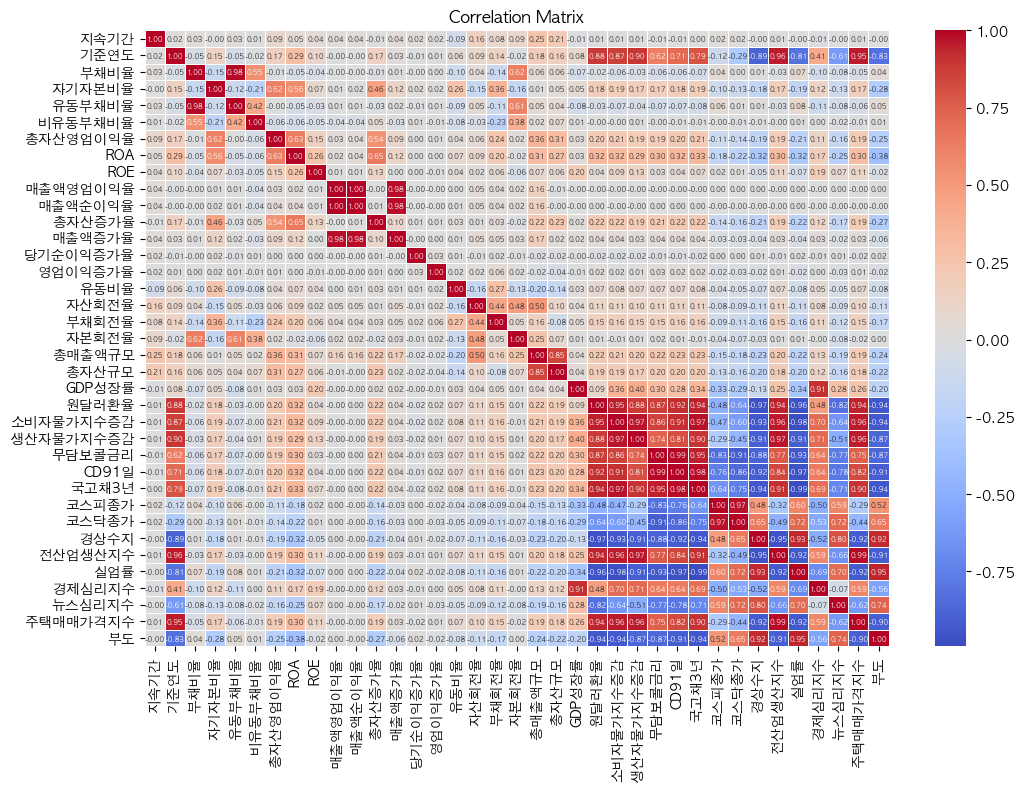

In [308]:
plt.figure(figsize=(12, 8))
sns.heatmap(corp_fin.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

## 1) 1차 제거

In [309]:
corp_fin.drop(['유동부채비율', '비유동부채비율', '매출액순이익율', '국고채3년', '무담보콜금리', '코스피종가', '경상수지', '소비자물가지수증감', '생산자물가지수증감', '실업률', '주택매매가격지수'],\
    axis=1, inplace=True)

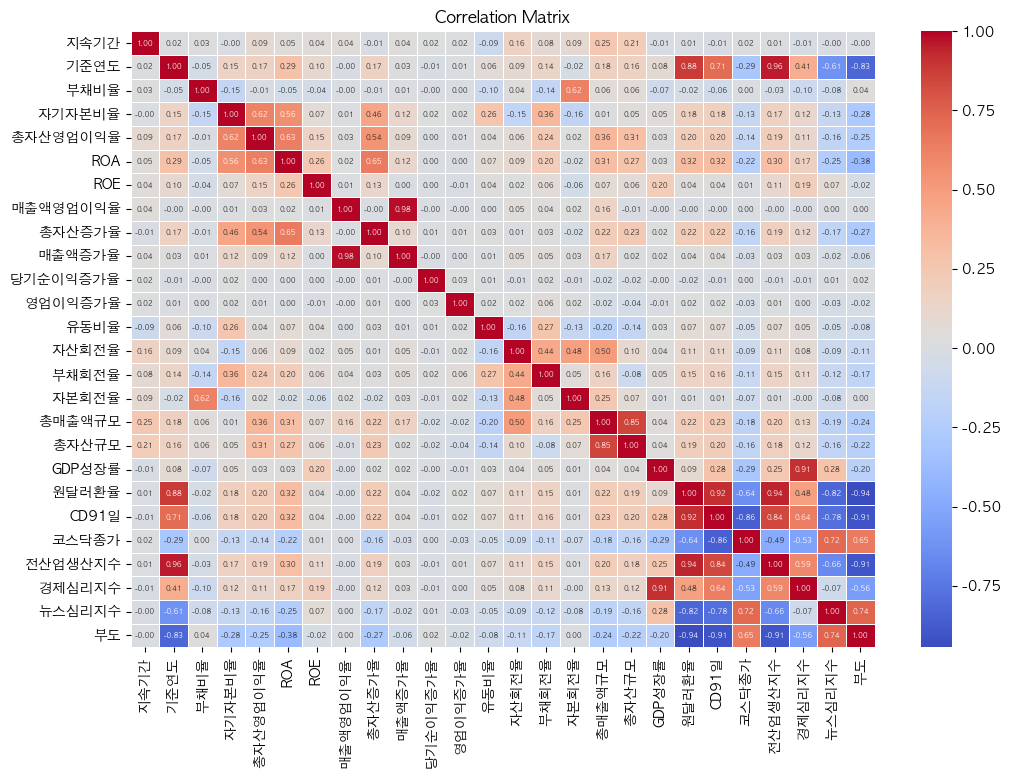

In [310]:
plt.figure(figsize=(12, 8))
sns.heatmap(corp_fin.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

In [311]:
corp_fin.shape

(1522, 30)

In [312]:
corp_fin.to_csv('./data/기업별재무거시데이터.csv', index=False)

In [313]:
delist_fin['폐지전년도'] = delist_fin['폐지일'].dt.year - 1
delist_fin['폐지전년도'].value_counts().sort_index()

2015     8
2016     8
2017    14
2018     4
2019    13
2020    19
2021    14
2022     7
Name: 폐지전년도, dtype: int64

In [314]:
corp_fin.부도.value_counts()

0    1435
1      87
Name: 부도, dtype: int64

In [317]:
corp_fin.shape

(1522, 30)

In [316]:
corp_fin.tail(2)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
86,에스앤씨엔진그룹,900080,2009-12-04,4210,2018,312.335171,0.242521,-0.284612,-0.731113,-1.675690,-0.425595,-19.096169,-17.136242,72.071490,65.645183,0.628513,0.668739,0.882848,2.757445,23.639104,24.041466,-0.71,1180.3,0.92,968.42,100.0,79.18,96.71,1,2021-06-14
87,차이나하오란,900090,2010-02-05,3253,2016,-303.231729,-0.492049,-0.257421,-0.786117,4.113248,-0.827248,-214.157097,-787.019870,-79.934839,-90.273511,0.384870,0.311178,0.208557,-0.632412,23.051767,24.219158,2.91,1100.2,1.68,675.65,100.1,97.83,99.70,1,2019-01-02
